In [1]:
import matplotlib.pyplot as plt
import setup
import numpy as np
import torch
from tqdm import tqdm
from model import MLP
from dataloaders import DemoDataset
from dataloaders import DemoDataset
from utils import read_json

In [2]:
# setup dataloader instances
cfg = read_json("config.json")
dataset_cfg = cfg["dataset"]
dataloader_cfg = cfg["dataloader"]
test_cfg = cfg["test"]

# train on recording_0003_2020_12_3, with all data
dataset = DemoDataset(**dataset_cfg["params"])

dataset start time 0.5355069637298584, end time 13.734471321105957
there are 1320 samples


In [3]:
# build model architecture, then print to console
model = MLP(input_dims=12, output_dims=6)
# get function handles of loss and metrics
criterion = torch.nn.MSELoss()
metrics = []

ckpt = torch.load("saved/ckpts/ckpt-epoch100.pth")
model.load_state_dict(ckpt["state_dict"])

# device = torch.device('cuda')
model = model.to('cuda')
model.eval()

loss_ls = []
total_metrics = torch.zeros(len(metrics))

with torch.no_grad():
    for i in tqdm(range(len(dataset))):
        state_action, target = dataset.__getitem__(i)
        state_action = torch.tensor(state_action).to('cuda')
        target = torch.tensor(target).to('cuda')     
       
        output = model(state_action)

        loss = criterion(output, target)
        loss_ls.append(loss.item())

100%|██████████| 1320/1320 [00:00<00:00, 2303.34it/s]


In [6]:
time_stamp = np.arange(0.5355069637298584, 13.734471321105957, 0.01)

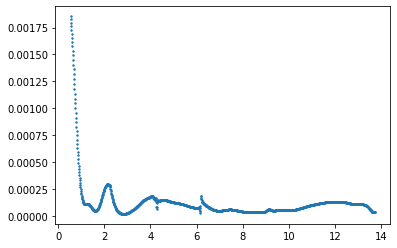

In [7]:
plt.scatter(time_stamp, loss_ls, s=2)

pretty much the same as train on 02, but the loss is rather small